<a href="https://colab.research.google.com/github/poolGolez/tf-playground/blob/main/exercises/%5Bregression%5D_habitability_trimmed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Habitability

# Habitability

📗 **Dataset Source**: [Kaggle](https://www.kaggle.com/datasets/ifteshanajnin/get-a-room-ml-hackathon-by-hackerearth)

## Ingest

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [31]:
FILE_LOCATION = '/gdrive/My Drive/Me/Learning/TensorFlow Developer Certificate: Zero to Mastery/data/habitability/train.csv'

df = pd.read_csv(FILE_LOCATION)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39499 entries, 0 to 39498
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property_ID             39499 non-null  object 
 1   Property_Type           39499 non-null  object 
 2   Property_Area           39499 non-null  int64  
 3   Number_of_Windows       37845 non-null  float64
 4   Number_of_Doors         39499 non-null  int64  
 5   Furnishing              38457 non-null  object 
 6   Frequency_of_Powercuts  38116 non-null  float64
 7   Power_Backup            39499 non-null  object 
 8   Water_Supply            39499 non-null  object 
 9   Traffic_Density_Score   39499 non-null  float64
 10  Crime_Rate              38712 non-null  object 
 11  Dust_and_Noise          38280 non-null  object 
 12  Air_Quality_Index       39499 non-null  float64
 13  Neighborhood_Review     39499 non-null  float64
 14  Habitability_score      39499 non-null

## Exploratory Data Analysis

### Exploring the categorical attributes

**The Categorical Columns**
* ***Property_ID*** - unique identifier of the property
* ***Property_Type*** - type of the property (*Apartment*, *Bungalow*, etc.)
* ***Furnishing*** - type of furnishing (*Fully Furnished*, *Semi-Furnished*, or *Unfurnished*)
* ***Power_Backup*** - availability of power backup
* ***Water_Supply*** - avaialbility of water supply (*All the time*, *Once in a day - Morning*, *Once in a day - Evening*, and *Once in two days*)
* ***Crime_Rate*** - crime rate in the neighborhood (*Well below average*, *Slightly below average*, *Slightly above average*, and *Well above average*)
* ***Dust_and_Noise*** - quantity of dust and noise in the neighborhood (*High*, *Medium*, and *Low*)

In [32]:
categorical_df = df.select_dtypes(include=['object'])
categorical_df.columns

Index(['Property_ID', 'Property_Type', 'Furnishing', 'Power_Backup',
       'Water_Supply', 'Crime_Rate', 'Dust_and_Noise'],
      dtype='object')

The possible values of the categorical columns, except for the ***Property_ID***:
* ***Property_Type***: `Apartment`, `Bungalow`, `Single-family home` `Duplex`, `#R%$G&867`, and `Container Home`
* ***Furnishing***: `Semi_Furnished`, `Unfurnished`, and `Fully Furnished`
* ***Power_Backup***: `No`, `Yes`, and `NOT MENTIONED`
* ***Water_Supply***: `Once in a day - Morning`, `Once in a day - Evening`, `All time`, `NOT MENTIONED`, and `Once in two days`
* ***Crime_Rate***: `Slightly below average`, `Well below average`, `Well above average`, and `Slightly above average`
* ***Dust_and_Noise***: `Medium`, `High`, and `Low`

In [33]:
for col_name in categorical_df.columns.drop('Property_ID'):
  print(f"{col_name}: {categorical_df[col_name].unique()}")

Property_Type: ['Apartment' 'Bungalow' 'Single-family home' 'Duplex' '#R%$G&867'
 'Container Home']
Furnishing: ['Semi_Furnished' 'Unfurnished' 'Fully Furnished' nan]
Power_Backup: ['No' 'Yes' 'NOT MENTIONED']
Water_Supply: ['Once in a day - Morning' 'Once in a day - Evening' 'All time'
 'NOT MENTIONED' 'Once in two days']
Crime_Rate: ['Slightly below average' 'Well below average' 'Well above average' nan
 'Slightly above average']
Dust_and_Noise: ['Medium' nan 'High' 'Low']


### Exploring the numeric attributes

**The Numeric Columns**
* ***Property_Area*** - area of the property in $feet^2$
* ***Number_of_Windows*** - number of windows avaialable in the property
* ***Number_of_Doors*** - number of doors available in the property
* ***Frequency_of_Powercuts*** - average number of power cuts per week
* ***Traffic_Density_Score*** - represents the density of traffic on a scale of $1$ to $10$
* ***Air_Quality_Index*** - see [Wikipedia](https://en.wikipedia.org/wiki/Air_quality_index#United_States) for explanation (can be > 1000)
* ***Neighborhood_Review*** - average ratings given to the neighborhood by the people ranging from $1$ (*lowest*) to $5$ (*highest*)
* ⭐ ***Habitability_Score*** - the score of the property ranging from $0$ to $100$

In [34]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
print(f"Numeric Columns: {list(numeric_df.columns)}")

Numeric Columns: ['Property_Area', 'Number_of_Windows', 'Number_of_Doors', 'Frequency_of_Powercuts', 'Traffic_Density_Score', 'Air_Quality_Index', 'Neighborhood_Review', 'Habitability_score']


In [35]:
df.describe()

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score
count,39499.000000,37845.000000,39499.000000,38116.000000,39499.000000,39499.000000,39499.000000,39499.000000
mean,1391.715638,3.923768,2.331375,0.484678,6.354772,121.352566,3.735945,73.482297
std,1953.287544,2.690992,1.179964,0.752207,1.219681,62.384669,0.796843,14.118753
min,100.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.280000
25%,494.000000,2.000000,1.000000,0.000000,5.600000,95.000000,3.220000,69.660000
50%,932.000000,4.000000,2.000000,0.000000,6.470000,113.000000,3.850000,75.760000
75%,1770.000000,5.000000,3.000000,1.000000,7.220000,140.000000,4.260000,82.260000
max,28064.000000,15.000000,6.000000,3.000000,9.910000,1044.000000,5.000000,100.000000


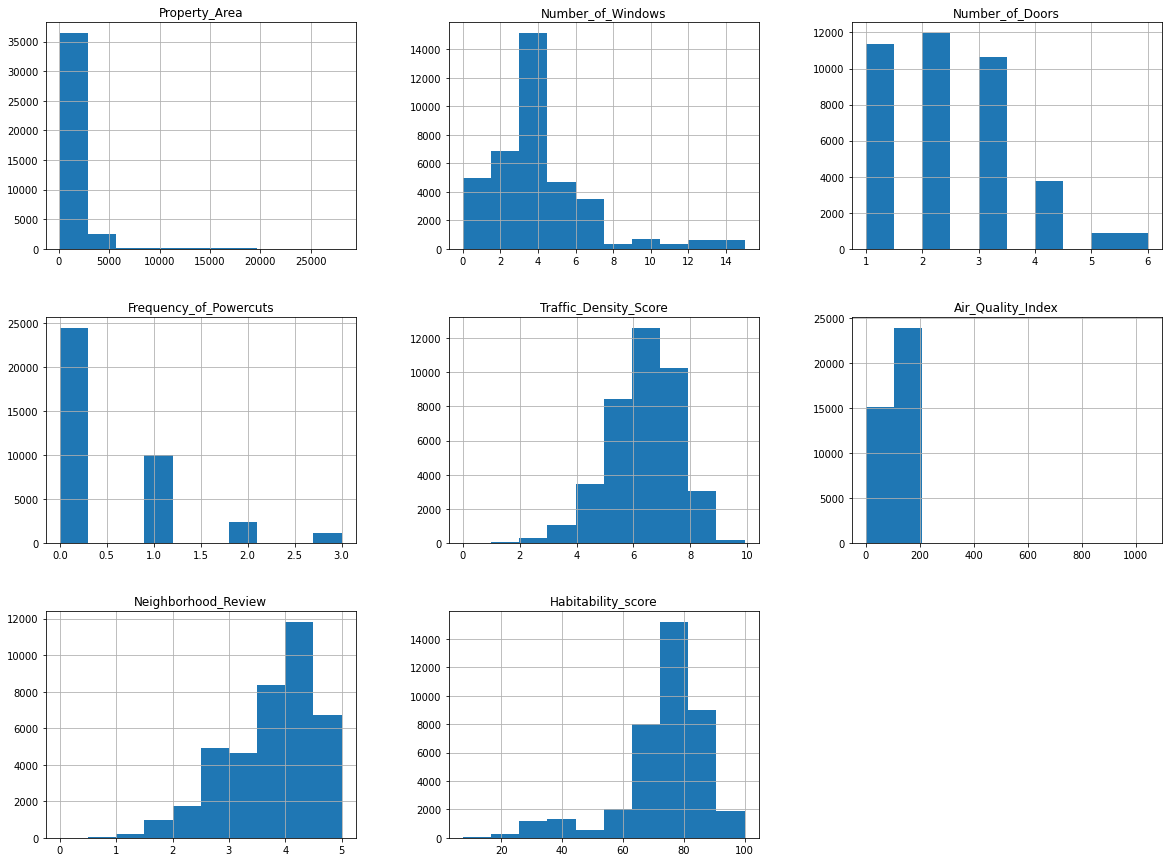

In [36]:
df.hist(figsize=(20,15))
plt.show()

### Data Correlation

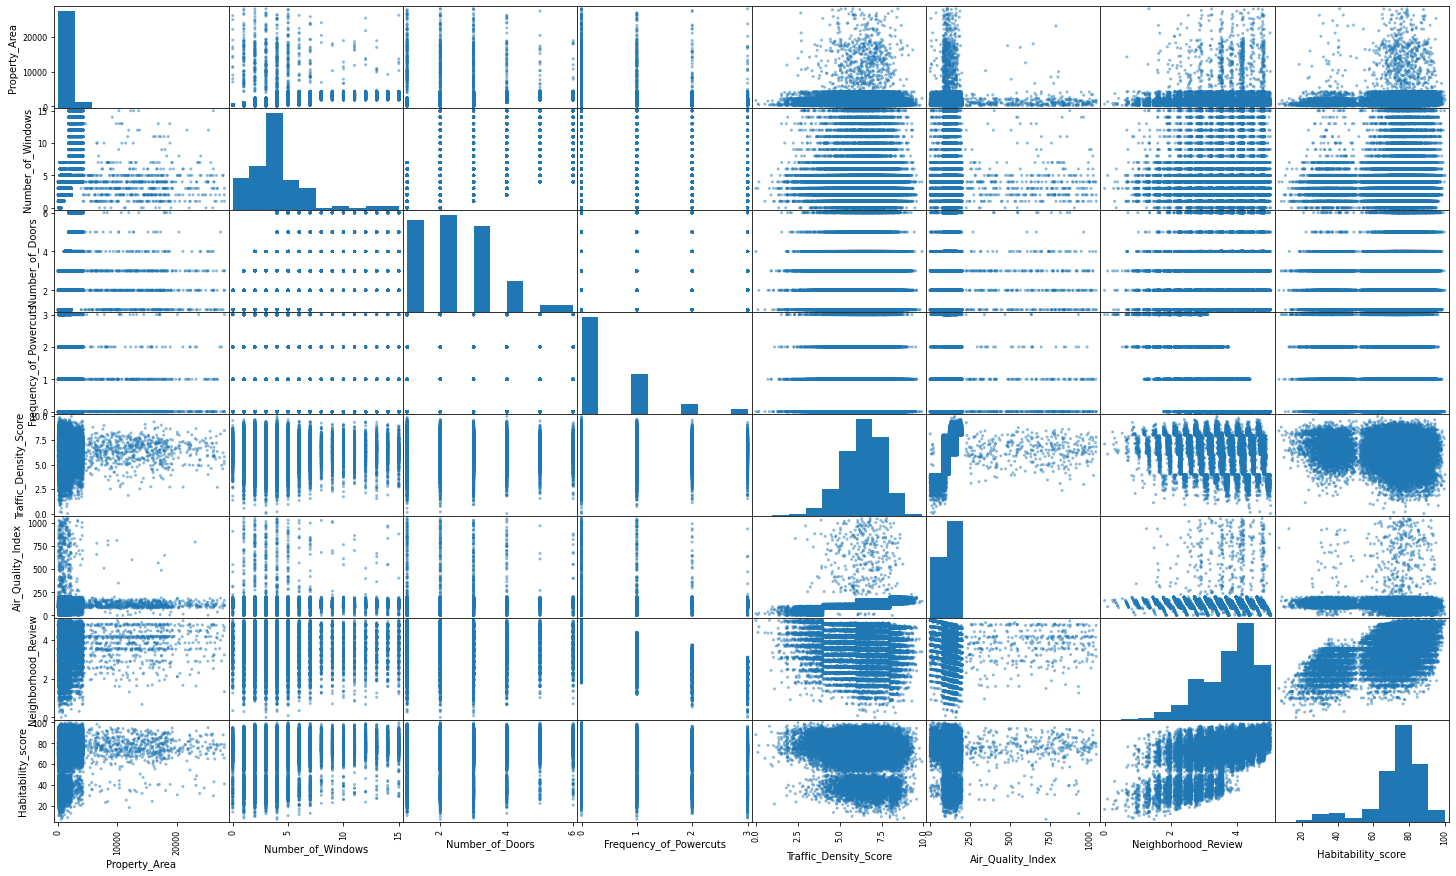

In [37]:
from pandas.plotting import scatter_matrix

scatter_matrix(numeric_df, figsize=(25,15))
plt.show()

In [38]:
numeric_df

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,106,NaN,1,0.0,5.89,90.0,3.86,71.98
1,733,2.0,2,1.0,4.37,96.0,3.55,71.20
2,737,4.0,2,0.0,7.45,121.0,3.81,71.39
3,900,3.0,2,2.0,6.16,100.0,1.34,31.46
4,2238,14.0,6,0.0,5.46,116.0,4.77,93.70
...,...,...,...,...,...,...,...,...
39494,1120,3.0,2,0.0,5.55,80.0,3.56,73.43
39495,445,1.0,3,1.0,5.70,86.0,2.93,79.91
39496,3780,6.0,6,0.0,6.84,137.0,3.80,81.44
39497,1266,3.0,1,0.0,4.60,88.0,3.25,71.33


In [39]:
df.corr()['Habitability_score'].sort_values(ascending=False)

Habitability_score        1.000000
Neighborhood_Review       0.540033
Number_of_Windows         0.094640
Number_of_Doors           0.072108
Property_Area             0.065079
Air_Quality_Index        -0.042233
Traffic_Density_Score    -0.070289
Frequency_of_Powercuts   -0.234487
Name: Habitability_score, dtype: float64

🔍 From the correlation matrix above, we find that:
* ***Neighborhood_Review*** has a significant **positive correlation** with the ***Habitability_score***
* ***Frequency_of_Powercuts*** has a significant **negative correlation with the ***Habitability_score***

## Data Cleaning and Preparation

### Feature Selection

We will use the two features with significant correlation with ***Habitability_score***: 

* ***Neighborhood_Review*** ($54.00\%$), and
* ***Frequency_of_Powercuts*** ($-23.45\%$)

In [40]:
prepared_df = df[['Neighborhood_Review', 'Frequency_of_Powercuts', 'Habitability_score']]
print(f"Prepard DF size: ${prepared_df.shape}")
prepared_df.head()

Prepard DF size: $(39499, 3)


,Neighborhood_Review,Frequency_of_Powercuts,Habitability_score
0,3.86,0.0,71.98
1,3.55,1.0,71.20
2,3.81,0.0,71.39
3,1.34,2.0,31.46
4,4.77,0.0,93.70


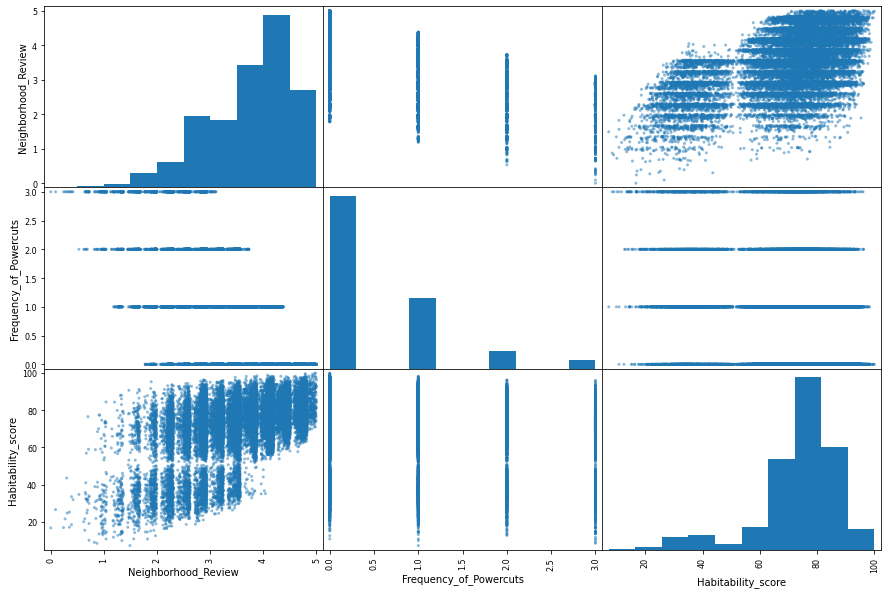

In [41]:
scatter_matrix(prepared_df, figsize=(15, 10))
plt.show()

### Missing Values

In [42]:
prepared_df.isna().sum()

Neighborhood_Review          0
Frequency_of_Powercuts    1383
Habitability_score           0
dtype: int64

In [43]:
X = prepared_df[['Neighborhood_Review', 'Frequency_of_Powercuts']]

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


powercut_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('encode', OneHotEncoder())
])

ct = ColumnTransformer([
    ('imputer', powercut_pipeline, ['Frequency_of_Powercuts']),
    ('std scaler', MinMaxScaler(), ['Neighborhood_Review']),
], remainder='passthrough')

X = ct.fit_transform(prepared_df[['Neighborhood_Review', 'Frequency_of_Powercuts']])
y = prepared_df[['Habitability_score']]

np.column_stack((X[:10], y[:10]))

array([[ 1.   ,  0.   ,  0.   ,  0.   ,  0.772, 71.98 ],
       [ 0.   ,  1.   ,  0.   ,  0.   ,  0.71 , 71.2  ],
       [ 1.   ,  0.   ,  0.   ,  0.   ,  0.762, 71.39 ],
       [ 0.   ,  0.   ,  1.   ,  0.   ,  0.268, 31.46 ],
       [ 1.   ,  0.   ,  0.   ,  0.   ,  0.954, 93.7  ],
       [ 1.   ,  0.   ,  0.   ,  0.   ,  0.898, 82.94 ],
       [ 1.   ,  0.   ,  0.   ,  0.   ,  0.58 , 74.88 ],
       [ 0.   ,  0.   ,  0.   ,  1.   ,  0.192, 28.54 ],
       [ 0.   ,  1.   ,  0.   ,  0.   ,  0.834, 88.11 ],
       [ 1.   ,  0.   ,  0.   ,  0.   ,  0.896, 80.65 ]])

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Train size: {len(X_train)}")
print(f"Test size: {len(X_test)}")
y_train.shape

Train size: 31599
Test size: 7900


(31599, 1)

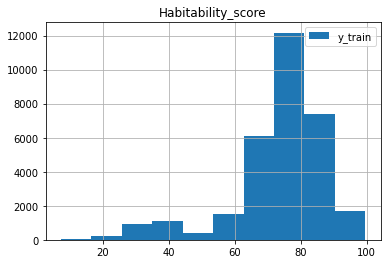

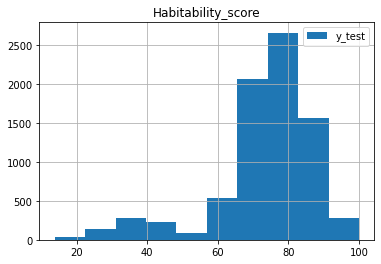

In [45]:
y_train.hist(label='y_train')
plt.legend()
y_test.hist(label='y_test')
plt.legend()


## Modelling


247/247 [==============================] - 0s 2ms/step


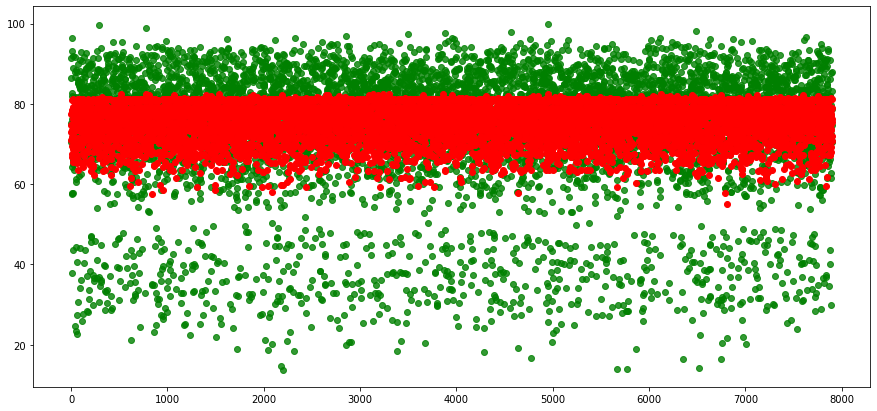

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([8.728762], dtype=float32)>

In [86]:
def show_model_graph(model): 
  tf.keras.utils.plot_model(model, show_shapes=True)
  plt.show()

def plot_training_history(history):
  plt.plot(history['mae'], label='mae')
  plt.legend()
  plt.show()

def plot_predictions(model, X, y):
  y_pred = model.predict(X)

  plt.figure(figsize=(15,7))
  plt.scatter(np.arange(len(y)), y, color='g', alpha=0.8)
  plt.scatter(np.arange(len(y_pred)), y_pred, color='r', alpha=1.0)
  plt.show()

  mae = tf.keras.metrics.mean_absolute_error(
      tf.expand_dims(y.squeeze(), axis=0), 
      tf.expand_dims(y_pred.squeeze(), axis=0)
      )

  return mae

plot_predictions(model_1, X_test, y_test)

### Model 1 (Baseline)
 This model consists of a single hidden layer with a single-unit, The model is trained using the **mean average error** and **Adam** optimizer for $100$ epochs.

In [87]:
import tensorflow as tf
tf.random.set_seed(18)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

history_1 = model_1.fit(X_train, y_train, epochs=100, verbose=0)

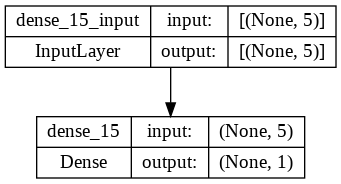

In [88]:
tf.keras.utils.plot_model(model_1, show_shapes=True)

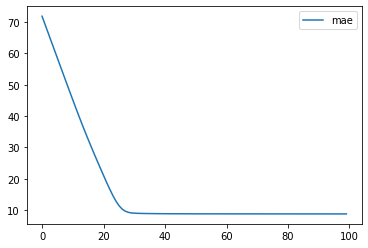

In [89]:
plot_training_history(history_1.history)

247/247 [==============================] - 0s 1ms/step


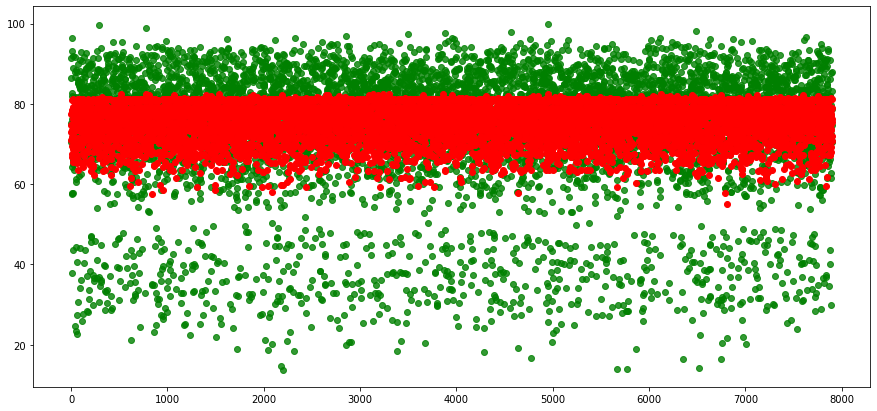

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([8.728762], dtype=float32)>

In [90]:
plot_predictions(model_1, X_test, y_test)

### Model 2

 ~~This model consists of a single hidden layer with a single-unit, The model is trained using the **mean average error** and **Adam** optimizer for $100$ epochs.~~


In [91]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

history_2 = model_2.fit(X_train, y_train, epochs=100, verbose=0)

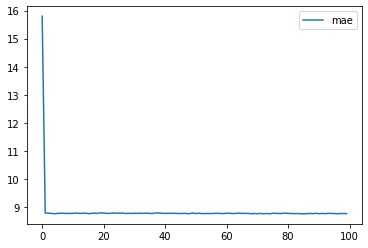

In [92]:
plot_training_history(history_2.history)

247/247 [==============================] - 0s 2ms/step


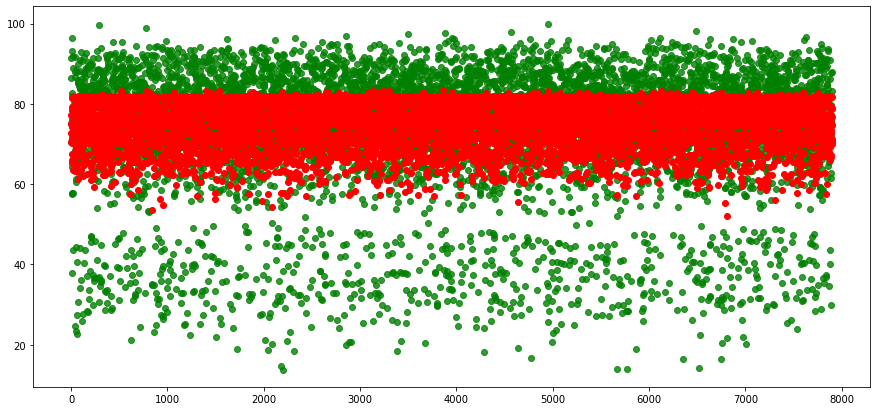

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([8.703427], dtype=float32)>

In [94]:
plot_predictions(model_2, X_test, y_test)